In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

In [2]:
# Load the data
data = pd.read_csv('Obfuscated-MalMem2022.csv')
X = data.drop(columns=['Category'])
y = data['Category']

In [3]:
# Convert string labels in 'y' to numerical using LabelEncoder
label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

In [4]:
# Convert string features in 'X' to numerical using LabelEncoder or OneHotEncoder
for column in X.select_dtypes(include=['object']).columns:
    # Use LabelEncoder if the feature is ordinal (has a meaningful order)
    # or OneHotEncoder if the feature is nominal (no meaningful order)
    # Here, we are using LabelEncoder for demonstration purposes.
    # You might need to use OneHotEncoder depending on your data.
    X[column] = label_encoder.fit_transform(X[column])

In [5]:
# Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

MemoryError: could not allocate 14861467648 bytes

In [45]:
import numpy as np
import pandas as pd

# Initialize scores
n_features = X.shape[1]
feature_scores = np.zeros(n_features)

for tree in rf.estimators_:
    tree_ = tree.tree_

    for node in range(tree_.node_count):
        feature = tree_.feature[node]

        # Skip leaf nodes
        if feature == -2:
            continue

        left = tree_.children_left[node]
        right = tree_.children_right[node]

        n_node_samples = tree_.n_node_samples[node]
        impurity_before = tree_.impurity[node]
        impurity_left = tree_.impurity[left]
        impurity_right = tree_.impurity[right]
        n_left = tree_.n_node_samples[left]
        n_right = tree_.n_node_samples[right]

        # Weighted impurity after split
        impurity_after = (n_left * impurity_left + n_right * impurity_right) / n_node_samples

        # Importance contribution
        importance_score = (impurity_before - impurity_after) * n_node_samples

        # Accumulate for the feature
        feature_scores[feature] += importance_score

In [47]:
# Normalize scores
feature_scores = feature_scores / feature_scores.sum()

# Final result as a pandas Series
final_scores = pd.Series(feature_scores, index=X.columns).sort_values(ascending=False)

In [49]:
# Plot before filtering (all features)
num_features = len(final_scores)
width_per_feature = 0.2
fig_width = max(15, num_features * width_per_feature)

Plot saved to feature_importance_before_selection.png


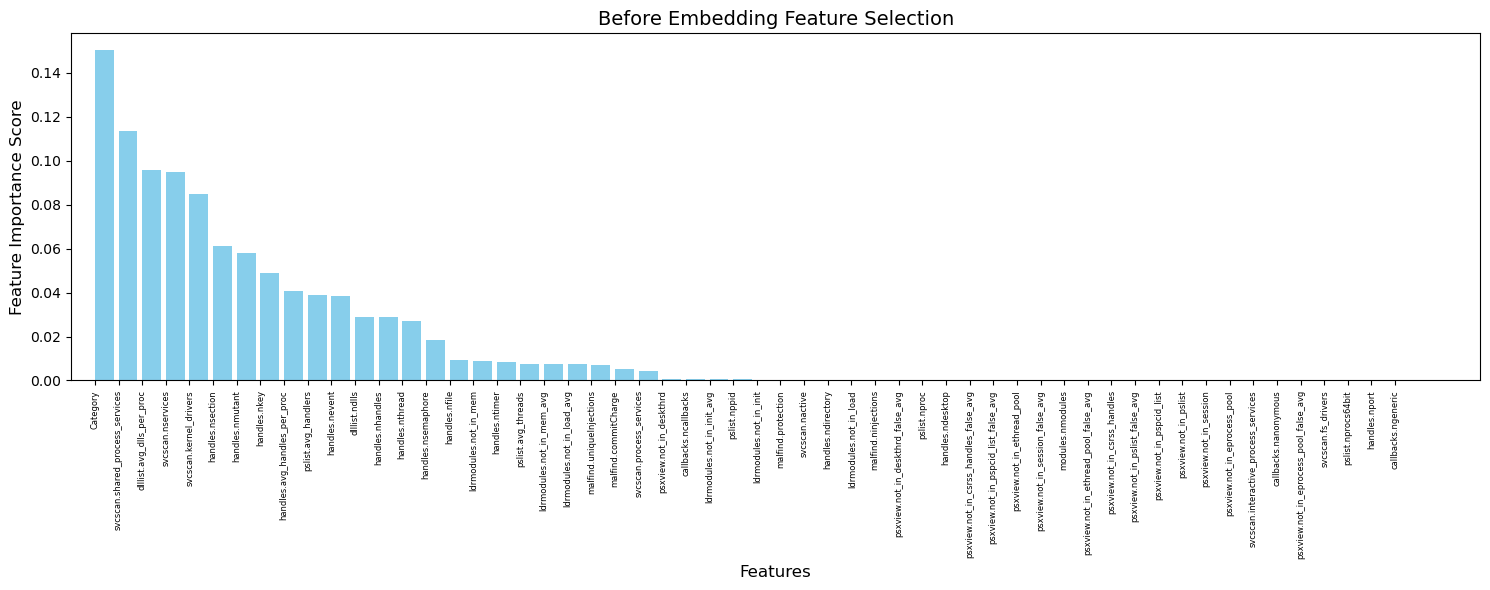

In [77]:
 plt.figure(figsize=(fig_width, 6))
plt.bar(final_scores.index, final_scores.values, color='skyblue', align='edge')
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Importance Score", fontsize=12)
plt.title("Before Embedding Feature Selection", fontsize=14)
plt.xlim(left=-1)
plt.tight_layout()
# Specify the file path to save the plot
plot_path = "feature_importance_before_selection.png"
plt.savefig(plot_path)  # Save the plot to a PNG file
print(f"Plot saved to {plot_path}")
plt.show()

In [79]:
# === Filter unimportant features ===
contributing_features = final_scores[final_scores > 0.0]
unimportant_features = final_scores[final_scores <= 0.0]

In [81]:
print(f"Original feature count: {len(final_scores)}")
print(f"Filtered feature count: {len(contributing_features)}")
print(f"Number of unimportant features: {len(unimportant_features)}")

Original feature count: 56
Filtered feature count: 49
Number of unimportant features: 7


In [83]:
 unimportant_features

svcscan.interactive_process_services      0.0
callbacks.nanonymous                      0.0
psxview.not_in_eprocess_pool_false_avg    0.0
svcscan.fs_drivers                        0.0
pslist.nprocs64bit                        0.0
handles.nport                             0.0
callbacks.ngeneric                        0.0
dtype: float64

Plot saved to feature_importance_after_selection.png


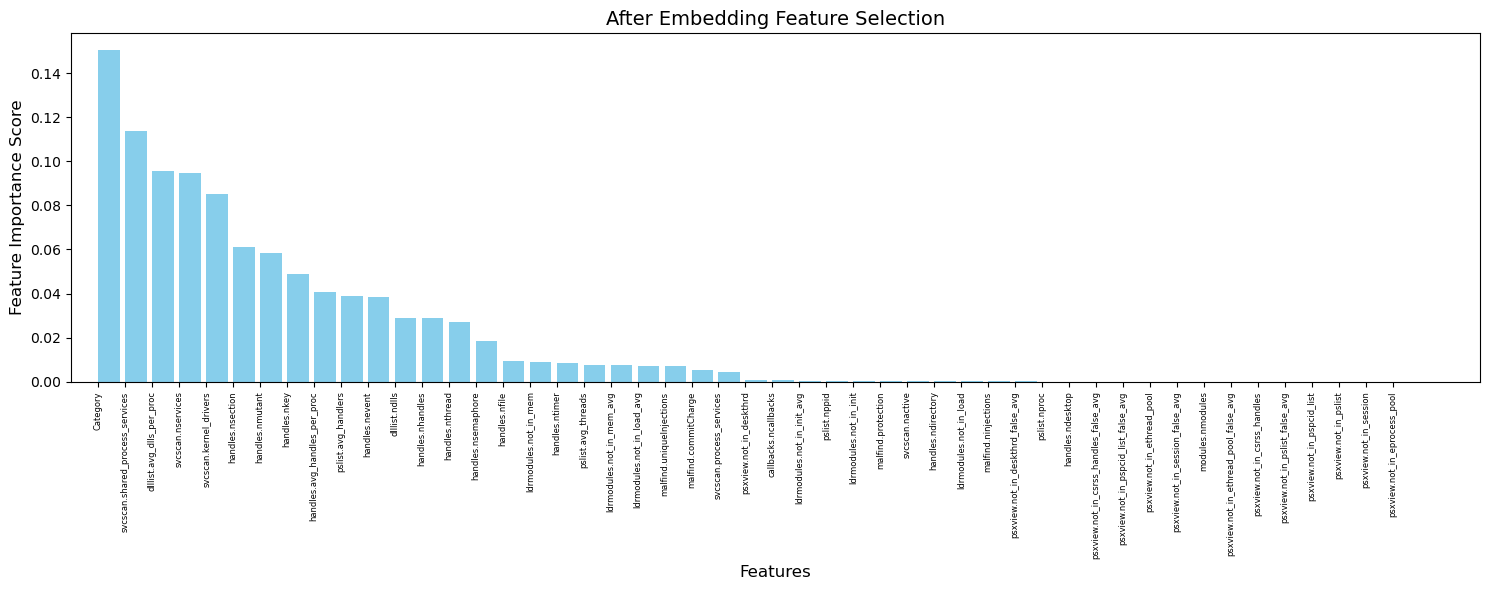

In [85]:
 num_features = len(contributing_features)
width_per_feature = 0.2
fig_width = max(15, num_features * width_per_feature)
plt.figure(figsize=(fig_width, 6))
plt.bar(contributing_features.index, contributing_features.values, color='skyblue', align='edge')
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Importance Score", fontsize=12)
plt.title("After Embedding Feature Selection", fontsize=14)
plt.xlim(left=-1)
plt.tight_layout()
# Specify the file path to save the plot
plot_path_a = "feature_importance_after_selection.png"
plt.savefig(plot_path_a)  # Save the plot to a PNG file
print(f"Plot saved to {plot_path_a}")

plt.show()

In [87]:
# Filter the features in X based on their importance
X_selected = X[contributing_features.index]

# Decode the numeric labels back to original string labels
y_decoded = label_encoder.inverse_transform(y)  # Convert back to original class names

# Add the decoded labels back to the selected features DataFrame
X_selected['label'] = y_decoded

# Save the new dataset with selected features and decoded labels
X_selected.to_csv("ObfuscatedFeatures.csv", index=False)
print("Saved the new filtered dataset with selected features and decoded labels to 'ObfuscatedFeatures.csv'")

C:\Users\bacaup\AppData\Local\Temp\ipykernel_16496\864407076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['label'] = y_decoded


Saved the new filtered dataset with selected features and decoded labels to 'ObfuscatedFeatures.csv'
